# Intro

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from keras import Sequential
from keras.layers import Dense 
import xgboost as xgb
import graphviz
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score

In [35]:
data = pd.read_csv("water_potability.csv")
data.head(3)
#data.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [37]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

### Filling in missing data

In [38]:
impute = SimpleImputer(missing_values=np.nan, strategy="mean")

df = data.values
impute = impute.fit(df)
df = impute.transform(df)

df = pd.DataFrame(data=df, columns=data.columns)

In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,3276.0,7.080795,1.469956,0.000000,6.277673,7.080795,7.870050,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,3276.0,333.775777,36.142612,129.000000,317.094638,333.775777,350.385756,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3276.0,66.396293,15.769881,0.738000,56.647656,66.396293,76.666609,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


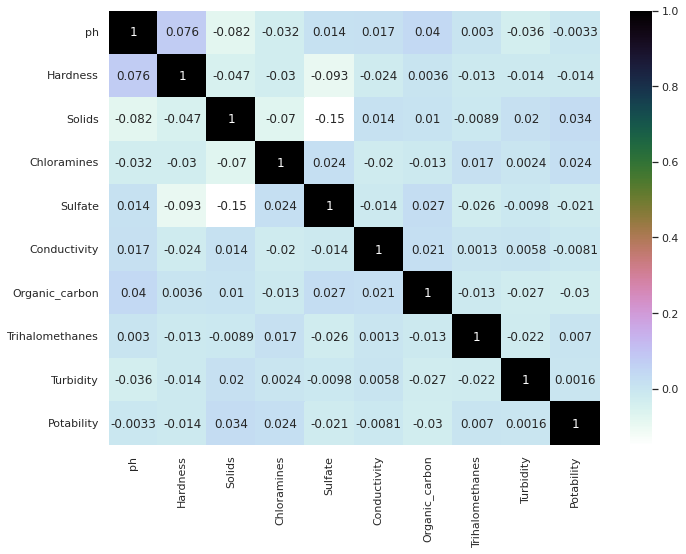

In [40]:
plt.figure(figsize=(11,8))
sns.heatmap(df.corr(), annot=True, cmap="cubehelix_r")

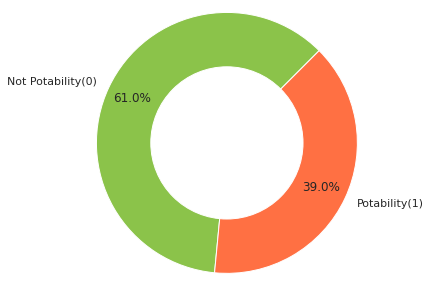

In [41]:
a = df["Potability"].value_counts()

plt.figure(figsize=(5,5))
plt.pie (a.values, labels=["Not Potability(0)", "Potability(1)"] , colors=['#8BC34A','#FF7043'], 
         startangle=45 , autopct='%1.1f%%', pctdistance=0.8, radius=1.2)
circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.show()

In [42]:
sns.pairplot(df, hue="Potability")

Output hidden; open in https://colab.research.google.com to view.

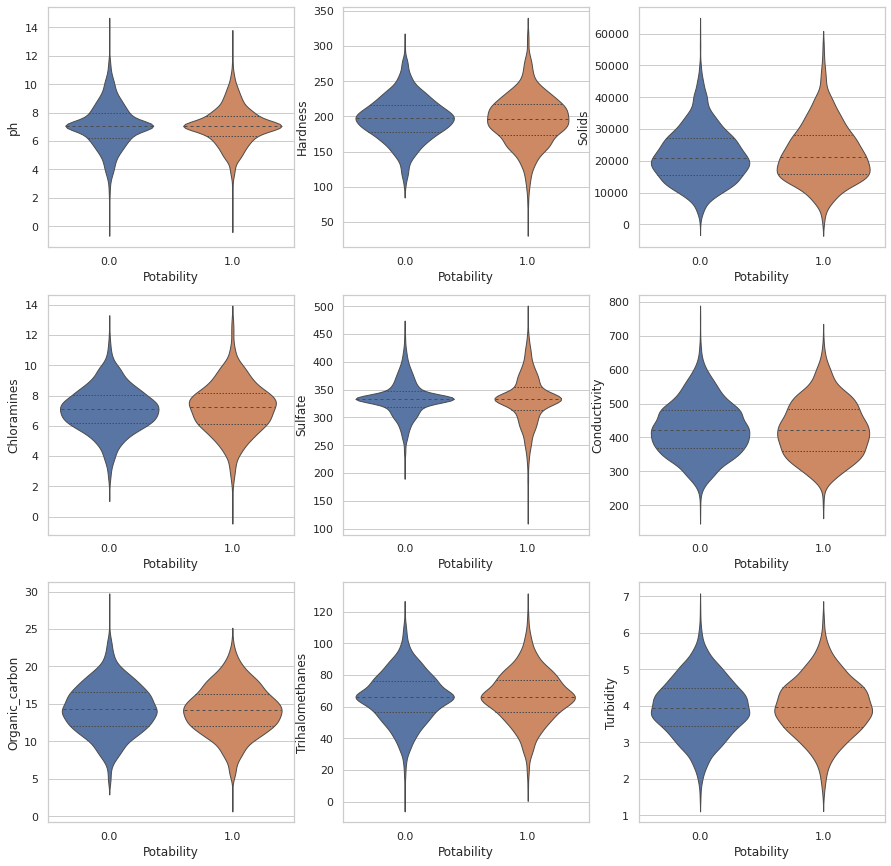

In [43]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,15))
for i in range(1,10):
    plt.subplot(3,3,i)
    sns.violinplot(data=df, x="Potability", y=df.iloc[:,i-1],
                   split=True, inner="quart", linewidth=1,)

### Train test split

In [44]:
x = df.iloc[:,:9].values #independent variables
y = df.iloc[:,-1].values #dependent variable

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print("x train shape : ", x_train.shape)
print("x test shape : ", x_test.shape)
print("y train shape : ", y_train.shape)
print("y test shape : ", y_test.shape)

x train shape :  (2293, 9)
x test shape :  (983, 9)
y train shape :  (2293,)
y test shape :  (983,)


In [45]:
def inference(model, x_test):
  print(classification_report(y_test, model.predict(x_test).round()))
  print("Accuracy : ", accuracy_score(y_test, model.predict(x_test)))
  plt.figure(figsize=(5,3))
  sns.heatmap(confusion_matrix(y_test, model.predict(x_test)), annot=True, cmap="Blues", fmt="d")

# Classification models

## 1.Logistic Regression (LDA)

              precision    recall  f1-score   support

         0.0       0.63      1.00      0.77       617
         1.0       1.00      0.00      0.01       366

    accuracy                           0.63       983
   macro avg       0.81      0.50      0.39       983
weighted avg       0.77      0.63      0.49       983

Accuracy :  0.6286876907426246


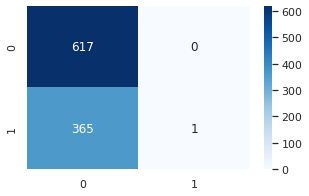

In [46]:
lda = LDA()

x_train2 = lda.fit_transform(x_train, y_train)
x_test2 = lda.transform(x_test)

model1 = LogisticRegression(random_state=42)
model1.fit(x_train2, y_train)

inference(model1, x_test2)

## 2.KNN

### Scaling of data

In [47]:
scaler = MinMaxScaler()
scaler.fit(x_train)
X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)

              precision    recall  f1-score   support

         0.0       0.68      0.81      0.74       617
         1.0       0.53      0.36      0.43       366

    accuracy                           0.64       983
   macro avg       0.61      0.59      0.59       983
weighted avg       0.63      0.64      0.63       983

Accuracy :  0.6439471007121058


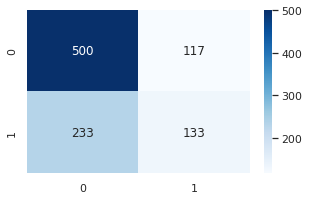

In [48]:
model2 = KNeighborsClassifier(n_neighbors=10, metric="manhattan", weights="distance")
model2.fit(X_train, y_train)

inference(model2, X_test)

## 3.SVM

In [49]:
model3 = SVC()

### Grid search cv

In [50]:
p = [#{"C":[1,2,3,4,5], "kernel":["linear"]},
    {"C":[1,10,100], "kernel":["rbf", "poly"], "gamma":[1.0,0.5]}]

gs = GridSearchCV(estimator=model3, param_grid=p, scoring="accuracy", n_jobs=-1)
grid_search = gs.fit(X_train,y_train)
best_score = grid_search.best_score_
best_param = grid_search.best_params_
print(best_param, " --> ", best_score)

{'C': 10, 'gamma': 1.0, 'kernel': 'poly'}  -->  0.6567875864562225


              precision    recall  f1-score   support

         0.0       0.69      0.93      0.79       617
         1.0       0.70      0.30      0.42       366

    accuracy                           0.69       983
   macro avg       0.70      0.61      0.60       983
weighted avg       0.69      0.69      0.65       983

Accuracy :  0.6917599186164801


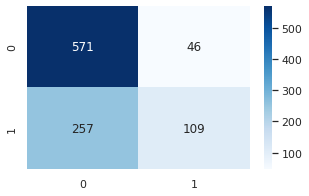

In [51]:
model3.kernel = "rbf"
model3.gamma = 1
model3.C = 100
model3.fit(X_train, y_train)

inference(model3, X_test)

## 4.Decision tree

              precision    recall  f1-score   support

         0.0       0.64      0.98      0.78       617
         1.0       0.76      0.08      0.15       366

    accuracy                           0.65       983
   macro avg       0.70      0.53      0.47       983
weighted avg       0.69      0.65      0.55       983

Accuracy :  0.6490335707019329


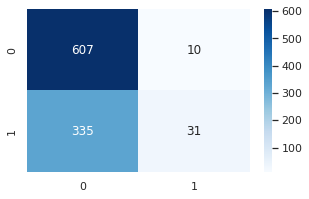

In [52]:
model4 = DecisionTreeClassifier(criterion="entropy", max_features="auto", max_depth=5, random_state=1)
model4.fit(x_train, y_train)

inference(model4, x_test)

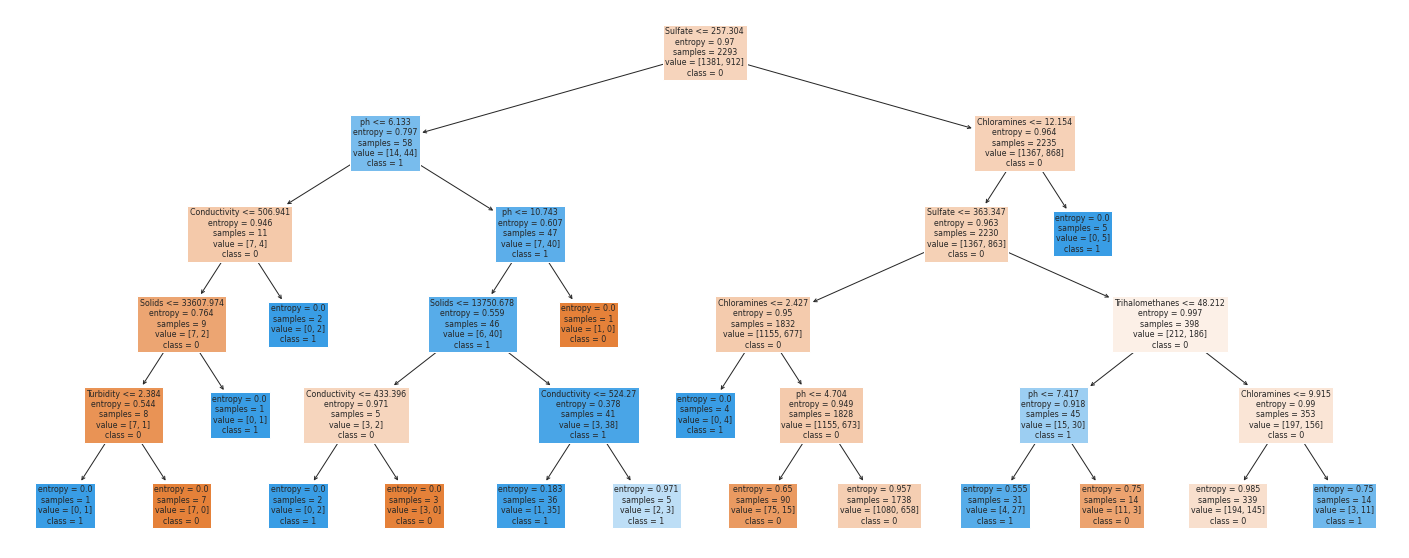

In [53]:
fig = plt.figure(figsize=(25,10))
tree.plot_tree(model4, 
                   feature_names=df.columns[:-1],  
                   class_names=["0","1"],
                   filled=True)

fig.savefig("decision_tree.png")

## 5.Random forest

              precision    recall  f1-score   support

         0.0       0.68      0.83      0.75       617
         1.0       0.55      0.35      0.43       366

    accuracy                           0.65       983
   macro avg       0.62      0.59      0.59       983
weighted avg       0.64      0.65      0.63       983

Accuracy :  0.6531027466937945


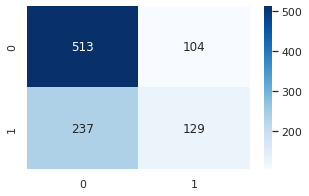

In [54]:
model5 = RandomForestClassifier(n_estimators=10, criterion="gini", random_state=0)
model5.fit(x_train, y_train)

inference(model5, x_test)

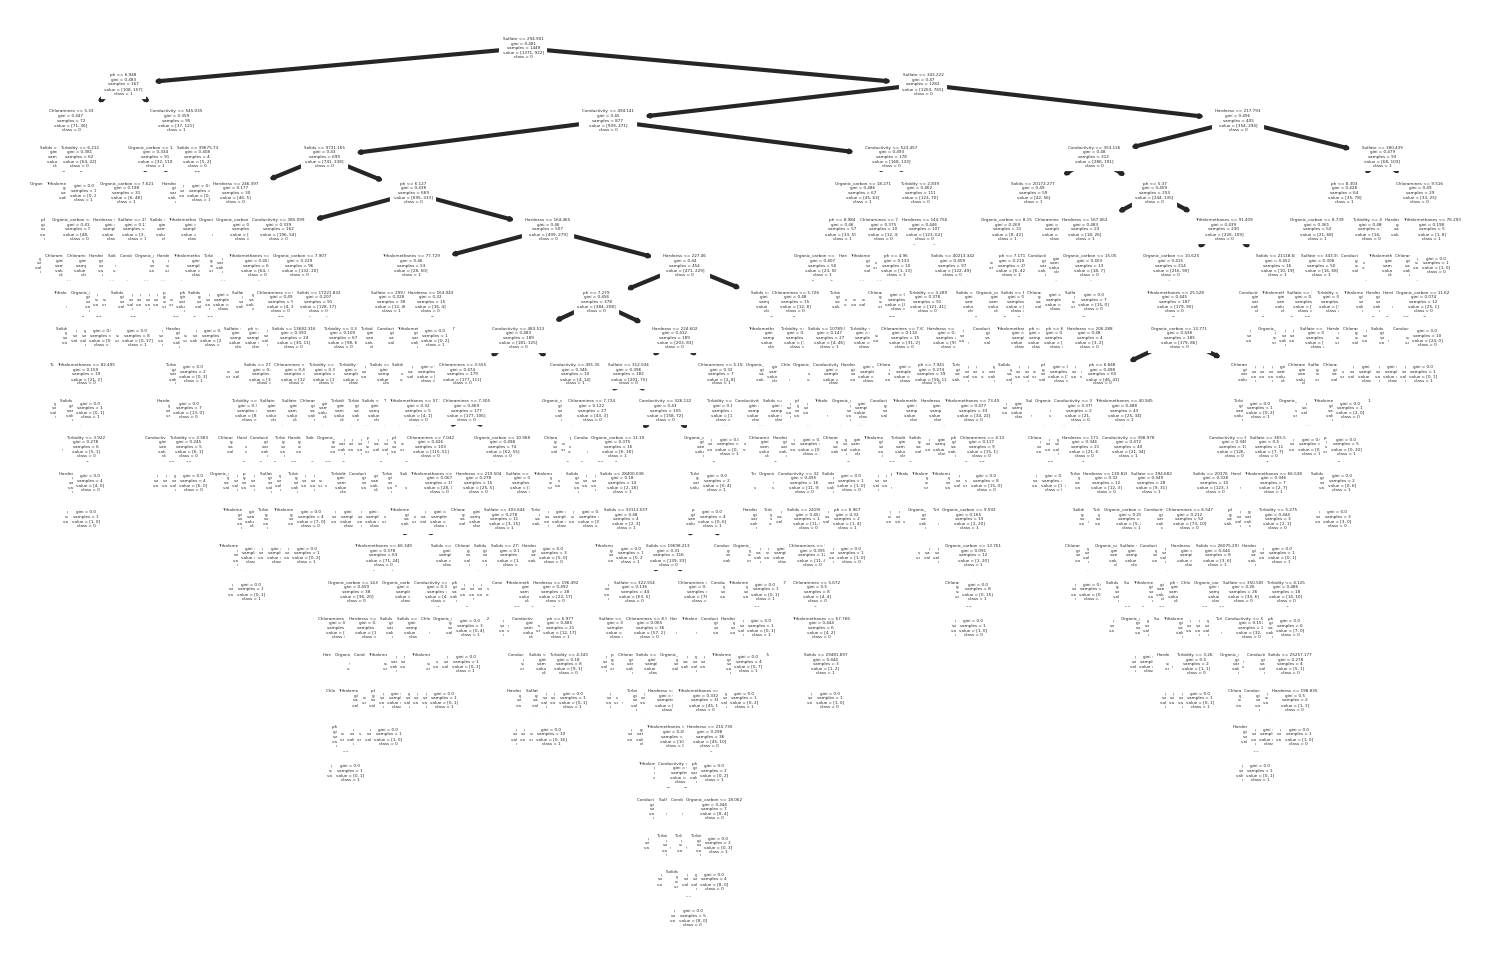

In [55]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, dpi=300)
tree.plot_tree(model5.estimators_[0],
               feature_names = df.columns[:-1], 
               class_names = ["0","1"])
fig.savefig("random_forest.png")

## 6.Xgboost

In [56]:
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)
parameters = {"max_depth" : 2,
              "eta" : 0.2,
              "num_class" : 2}
model6 = xgb.train(parameters, dtrain=dtrain)
precision_score(y_test, model6.predict(dtest))

0.7021276595744681

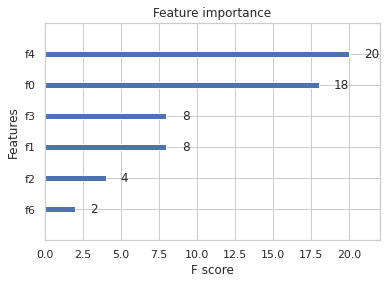

In [57]:
xgb.plot_importance(model6)

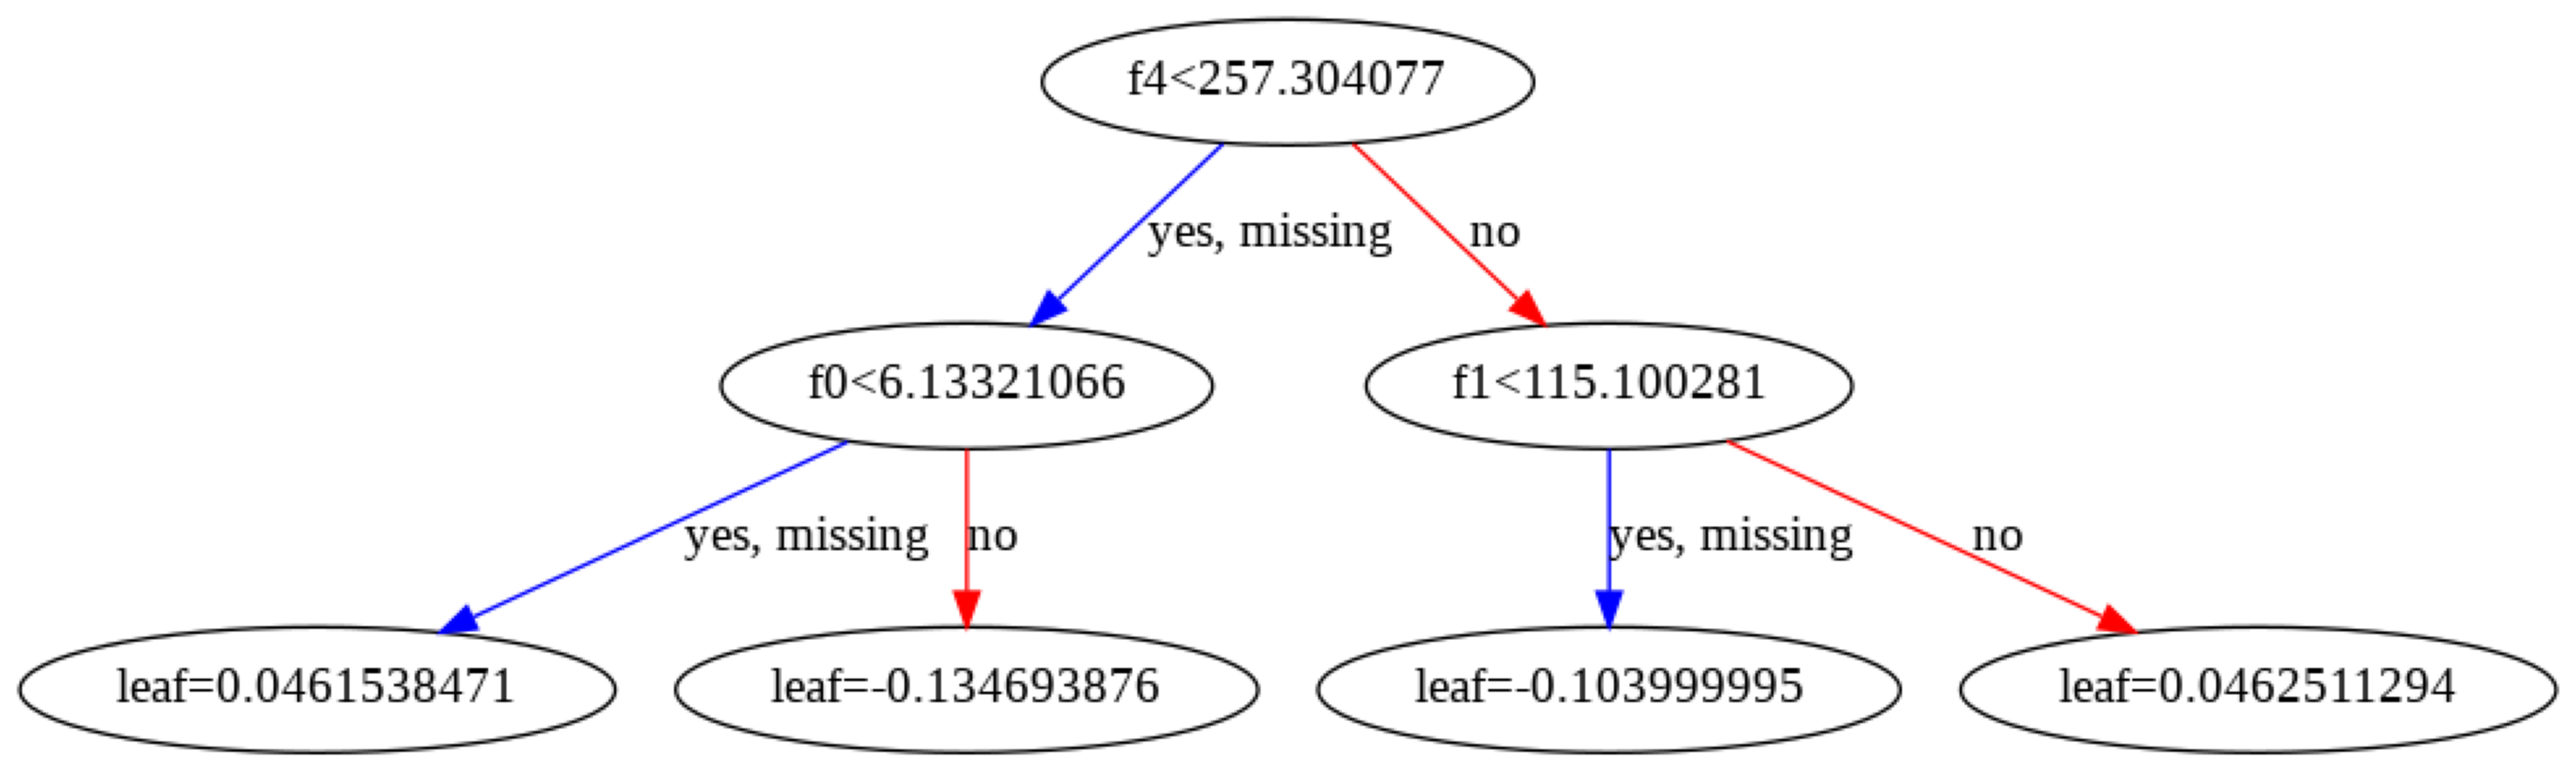

In [58]:
xgb.plot_tree(model6)
fig = plt.gcf()
fig.set_size_inches(50,50)

## 7.ANN

In [59]:
model7 = Sequential()
model7.add(Dense(16, activation="relu", input_dim=9)) 
model7.add(Dense(32, activation="relu")) 
model7.add(Dense(32, activation="relu"))
model7.add(Dense(32, activation="relu")) 
model7.add(Dense(32, activation="relu")) 
model7.add(Dense(1, activation="sigmoid"))
model7.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model7.fit(X_train, y_train, epochs=250, verbose=1, batch_size=128)

Epoch 1/250
18/18 [==============================] - 1s 2ms/step - loss: 0.6831 - accuracy: 0.5783
Epoch 2/250
18/18 [==============================] - 0s 3ms/step - loss: 0.6728 - accuracy: 0.6023
Epoch 3/250
18/18 [==============================] - 0s 2ms/step - loss: 0.6721 - accuracy: 0.6023
Epoch 4/250
18/18 [==============================] - 0s 2ms/step - loss: 0.6718 - accuracy: 0.6023
Epoch 5/250
18/18 [==============================] - 0s 2ms/step - loss: 0.6722 - accuracy: 0.6023
Epoch 6/250
18/18 [==============================] - 0s 3ms/step - loss: 0.6716 - accuracy: 0.6023
Epoch 7/250
18/18 [==============================] - 0s 2ms/step - loss: 0.6709 - accuracy: 0.6023
Epoch 8/250
18/18 [==============================] - 0s 3ms/step - loss: 0.6708 - accuracy: 0.6023
Epoch 9/250
18/18 [==============================] - 0s 3ms/step - loss: 0.6699 - accuracy: 0.6023
Epoch 10/250
18/18 [==============================] - 0s 3ms/step - loss: 0.6677 - accuracy: 0.6031
Epoch 11/

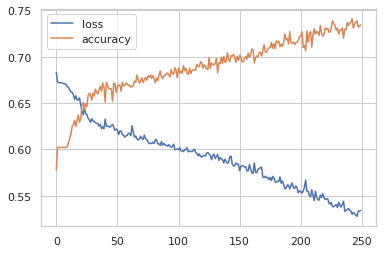

In [60]:
hist_loss = pd.DataFrame(model7.history.history)
hist_loss.plot()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Loss')

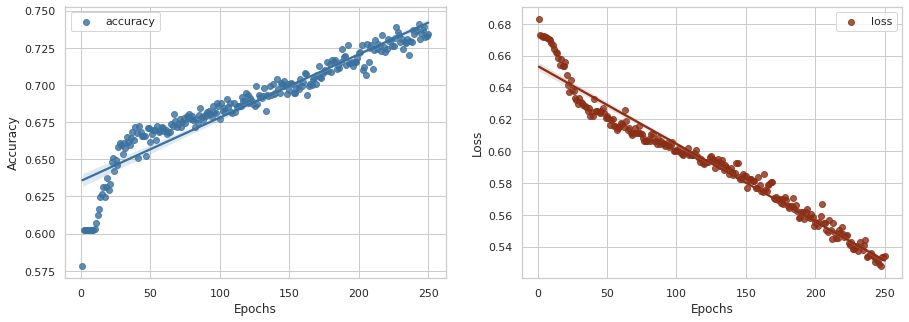

In [61]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.regplot(list(range(1,251)),model7.history.history["accuracy"], label="accuracy", color=sns.xkcd_rgb["muted blue"])
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.subplot(1,2,2)
sns.regplot(list(range(1,251)),model7.history.history["loss"], label="loss", color=sns.xkcd_rgb["red brown"])
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [62]:
model7.evaluate(X_test, y_test)

31/31 [==============================] - 0s 1ms/step - loss: 0.6554 - accuracy: 0.6633


[0.6553916931152344, 0.6632756590843201]